In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
data=pd.read_csv("C:\\Users\\ronit\\Downloads\\archive (2)\\AB_NYC_2019.csv")
data.head(n=3)
data.tail(n=3)
data.isnull().sum()
data.keys()
data['reviews_per_month']=data['reviews_per_month'].fillna(0)
data = data.dropna(subset=['name'])
data['host_name']=data['host_name'].fillna("Unknown")
print(stat.mean(data['price']))
data['price'].max(),data['price'].min()
data = data[data['price'] <= 1000]#removing outliers
data=data[data['price']>0]#removing listings with price 0
data=data[data['number_of_reviews']>0]
data['last_review_missing'] = data['last_review'].isnull().astype(int)
data['last_review'] = data['last_review'].fillna('1900-01-01')
data.isnull().sum()

152.72235520366618


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
last_review_missing               0
dtype: int64

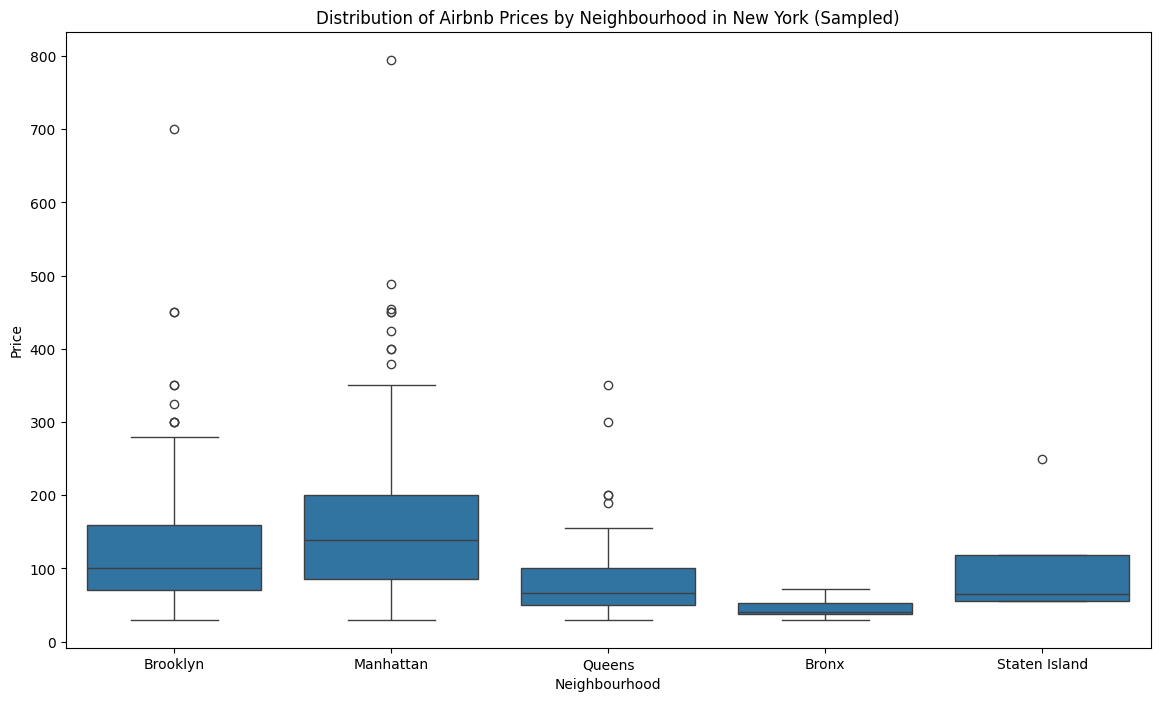

In [63]:
sampled_data=data.sample(frac=0.01,random_state=1)
plt.figure(figsize=(14, 8))
sns.boxplot(x='neighbourhood_group', y='price', data=sampled_data)
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.title('Distribution of Airbnb Prices by Neighbourhood in New York (Sampled)')
plt.show()

In [64]:
data.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_missing
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.0,1,147,0
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.0,6,339,0
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.0,1,87,0
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.0,1,40,0
48852,36455809,"Cozy Private Room in Bushwick, Brooklyn",74162901,Christine,Brooklyn,Bushwick,40.69805,-73.92801,Private room,30,1,1,2019-07-08,1.0,1,1,0


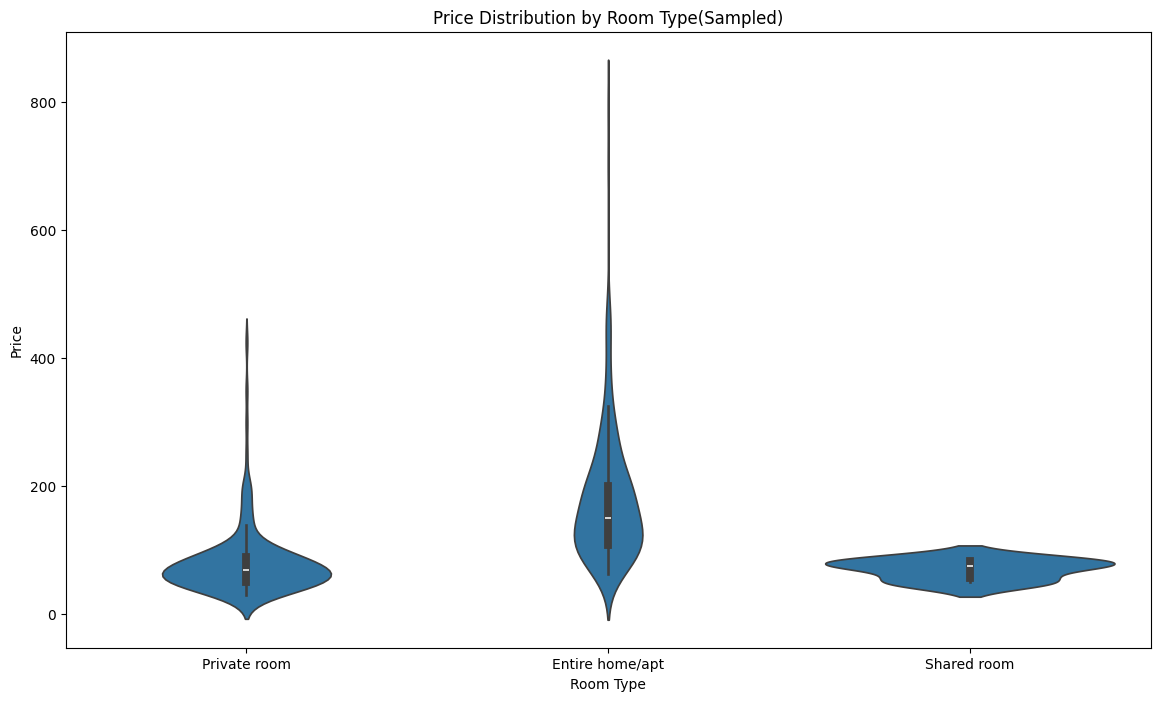

In [65]:
sampled_data=data.sample(frac=0.01,random_state=1)
plt.figure(figsize=(14, 8))
sns.violinplot(x='room_type', y='price', data=sampled_data)
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Price Distribution by Room Type(Sampled)')
plt.show()

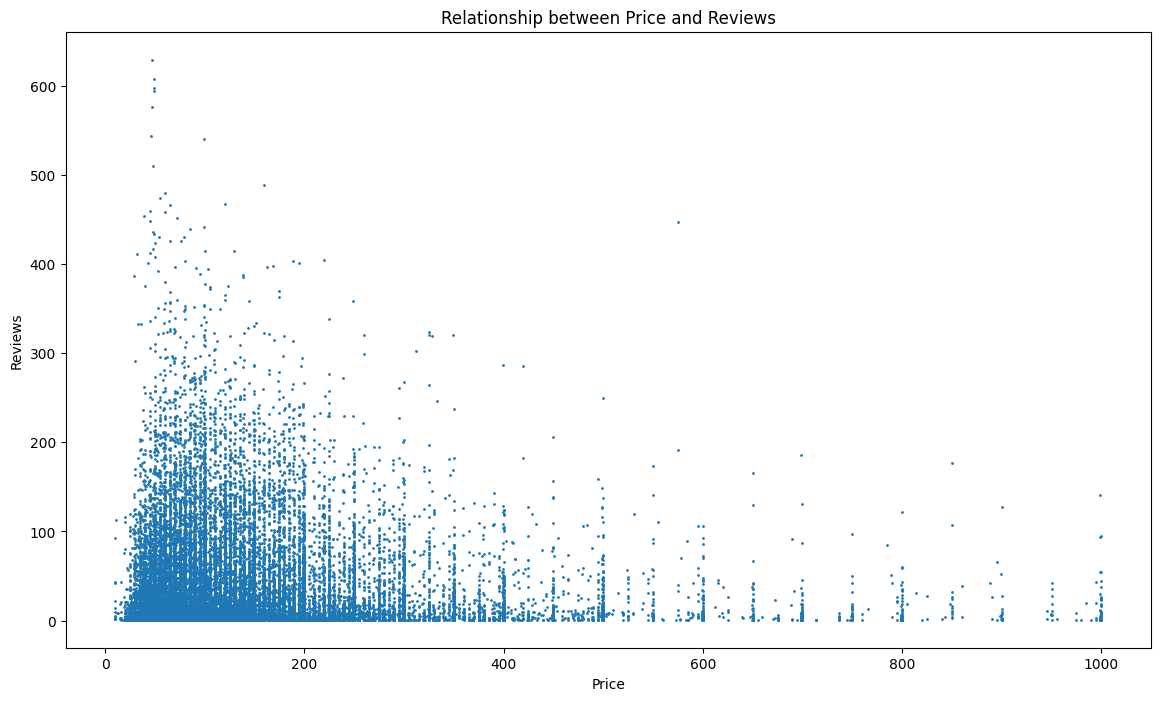

In [66]:
# Create a scatter plot of price vs reviews
plt.figure(figsize=(14,8))
plt.scatter(data['price'], data['number_of_reviews'],s=1)
plt.xlabel('Price')
plt.ylabel('Reviews')
plt.title('Relationship between Price and Reviews')
plt.show()

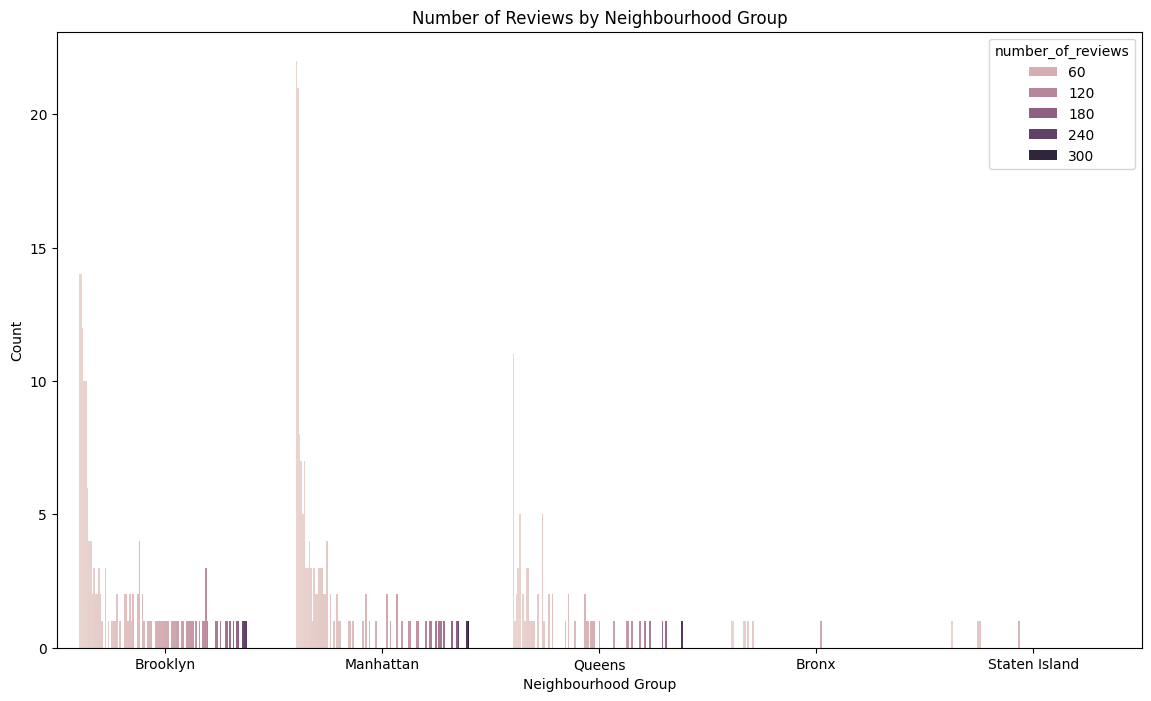

In [67]:
#comparing neighbourhood groups and number of reviews
plt.figure(figsize=(14,8))
sns.countplot(x='neighbourhood_group', hue='number_of_reviews', data=sampled_data)
plt.title('Number of Reviews by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.show()

In [72]:
#Correlation analysis
np.corrcoef(data['number_of_reviews'],data['price'])

array([[ 1.        , -0.04188524],
       [-0.04188524,  1.        ]])

Observations:

Weak negative correlation between number of reviews and price: The correlation coefficient is -0.04188524, indicating a weak negative correlation between the number of reviews and the price.
Correlation is not strong: The correlation coefficient is close to 0, indicating that the relationship between the number of reviews and the price is not strong.

Insights:
Number of reviews does not strongly influence price: The weak negative correlation suggests that the number of reviews does not have a significant impact on the price of a listing.
Other factors may be more important for pricing: The lack of a strong correlation between number of reviews and price implies that other factors, such as location, amenities, and host reputation, may be more important for determining the price of a listing.

Questions for further analysis:
What other factors are driving the price of listings? 
Are there other variables in the dataset that have a stronger correlation with price?
Is the relationship between number of reviews and price non-linear? 
Could there be a non-linear relationship between the number of reviews and price that is not captured by the correlation coefficient?
How does the correlation between number of reviews and price vary across different neighbourhood groups? 
Are there certain neighbourhood groups where the correlation is stronger or weaker?